<a href="https://colab.research.google.com/github/EmmanuelADAM/IntelligenceArtificiellePython/blob/master/TPMLGymQLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning
## Appliqué à [Gym.OpenAI](https://gym.openai.com)

---
## Présentation de Gym

Voir la page d'introduction à [Gym](https://gym.openai.com).

### Installation de gym 

#### Outil AUTRE QUE COLAB (pyzo, jupyter lab, .....)

In [ ]:
!pip install gymnasium

In [1]:
import gymnasium as gym

---
- Utiliser l'environnement `FrozenLake en mode 8x8 en mode texte` (un labyrinthe)
  - il est possible d'utiliser cet environnement en mode 'slipery', alors appliquer une *action n'est pas déterministe !*
    - à partir d'une case "gelée", aller à droite peut .. mener à droite, ou en haut ou en bas....
    - => intérêt du Q-Learning adapté à ce type d'environnement probabiliste
- Le labyrinthe est ainsi composé de zones glacées, de puits, et d'un objectif contenant une récompense


**N.B.** 
  - *Cet environnement fonctionne bien sous colab, jupyterlab.. quelques soucis de l'affichage de l'état courant (carré rouge) sous Pyzo....* 
  - Il est fortement conseillé de débuter avec un environnement déterministe pour évaluer la bonne marche de l'algo de Q-Learning que vous aurez développer..

---
#### Etude de l'environnement

In [2]:
env = gym.make('FrozenLake-v1', map_name="4x4", is_slippery=True, render_mode='ansi') 
# tester map_name="8x8" pour l'environnement plus large
print(env.spec)
print(env.action_space) #ici 4 actions discrétisée
print(env.observation_space) # ici 4x4 cellules possibles

env.reset()
print(env.render())
print("S = Start, G = Goal, H = Hole, F = Frozen place")

EnvSpec(id='FrozenLake-v1', entry_point='gymnasium.envs.toy_text.frozen_lake:FrozenLakeEnv', reward_threshold=0.7, nondeterministic=False, max_episode_steps=100, order_enforce=True, disable_env_checker=False, kwargs={'map_name': '4x4', 'is_slippery': True, 'render_mode': 'ansi'}, namespace=None, name='FrozenLake', version=1, additional_wrappers=(), vector_entry_point=None)
Discrete(4)
Discrete(16)

SFFF
FHFH
FFFH
HFFG

S = Start, G = Goal, H = Hole, F = Frozen place


---
#### Test des actions

En mode non déterministe, chaque action a 1 chance sur 3 de réussir..<br>
*Exemple aller à droite mène 1/3 à droite, 1/3 en haut, 1/3 en bas.*

In [3]:
###### Test des fonctions
env.reset()
action = 0
observation, reward, done, _, info = env.step(action)
print(env.render())
print("pos° actuelle:", observation,",gain:", reward,",fini:", done,",", info)

  (Left)
SFFF
FHFH
FFFH
HFFG

pos° actuelle: 4 ,gain: 0.0 ,fini: False , {'prob': 0.3333333333333333}


In [4]:
env.reset()
action = 1
observation, reward, done, _, info = env.step(action)
print(env.render())
print("pos° actuelle:", observation,",gain:", reward,",fini:", done,",", info)

  (Down)
SFFF
FHFH
FFFH
HFFG

pos° actuelle: 0 ,gain: 0.0 ,fini: False , {'prob': 0.3333333333333333}


In [5]:
env.reset()
action = 2
observation, reward, done, _, info = env.step(action)
print(env.render())
print("pos° actuelle:", observation,",gain:", reward,",fini:", done,",", info)

  (Right)
SFFF
FHFH
FFFH
HFFG

pos° actuelle: 0 ,gain: 0.0 ,fini: False , {'prob': 0.3333333333333333}


In [6]:
env.reset()
action = 3
observation, reward, done, _, info = env.step(action)
print(env.render())
print("pos° actuelle:", observation,",gain:", reward,",fini:", done,",", info)

  (Up)
SFFF
FHFH
FFFH
HFFG

pos° actuelle: 1 ,gain: 0.0 ,fini: False , {'prob': 0.3333333333333333}


In [7]:
#note : 
## observation = position où se trouve l'agent (no case(i,j) = i*largeur+j)
## reward = recompense
## done = but atteint
## truncated = etat feuille (non utilise ici)
## info = proba de reussite de l'action

On est clairement ici dans un environnement non déterministe (une même action à partir d'un même état ne mène pas toujours au même résultat); c'est le contexte de prédilection de l'algo de Q-Learning...

---
### <font color="red">Mise en place de l'environnement en mode déterministe</font>
Important, pour valider l'apprentissage de votre algorithme avant de passer en mode non-déterministe, il vaut mieux le tester sur un environnement où chaque action à 100% de réussite. Ci-dessous un exemple sur le mini labyrinthe.

In [67]:
env = gym.make('FrozenLake-v1', map_name="4x4", is_slippery=False, render_mode='ansi') 


In [28]:
actions = [2,2,1,1,1,2]
env.reset()
for a in actions:
    observation, reward, done,_, info = env.step(a)
    print(env.render())
    print("pos° actuelle:", observation,",gain:", reward,",fini:", done,",", info)


  (Right)
SFFF
FHFH
FFFH
HFFG

pos° actuelle: 1 ,gain: 0.0 ,fini: False , {'prob': 1.0}
  (Right)
SFFF
FHFH
FFFH
HFFG

pos° actuelle: 2 ,gain: 0.0 ,fini: False , {'prob': 1.0}
  (Down)
SFFF
FHFH
FFFH
HFFG

pos° actuelle: 6 ,gain: 0.0 ,fini: False , {'prob': 1.0}
  (Down)
SFFF
FHFH
FFFH
HFFG

pos° actuelle: 10 ,gain: 0.0 ,fini: False , {'prob': 1.0}
  (Down)
SFFF
FHFH
FFFH
HFFG

pos° actuelle: 14 ,gain: 0.0 ,fini: False , {'prob': 1.0}
  (Right)
SFFF
FHFH
FFFH
HFFG

pos° actuelle: 15 ,gain: 1.0 ,fini: True , {'prob': 1.0}


---
***Aide Python : (plusieurs possibilités)***
- Il n'est pas nécessaire de créer des classes Etat, ....
- Il faut pouvoir stocker les récompenses de chaque actions à partir de chaque case
  - a priori, la création d'une matrice 4x4 de 4 valeurs peut être utile.
  Plus simplement, on utilisera un tableau de n cases (pour les n etats) contenant m valeurs d'actions 
  

In [68]:
import numpy as np
# cree un tableau de n cases x m actions
q_actions = np.zeros((env.observation_space.n, env.action_space.n), np.float32)
print(q_actions)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


*Recherche du max et de sa position*

Reprenons la derniere modélisation sous forme de tableau de 4 valeurs.

In [69]:
#Exemple de recherche..
#1. ici pour l'exemple, on place des valeurs aléatoires pour les actions
Q = np.random.random((env.observation_space.n, env.action_space.n))
print(Q)

[[0.69857432 0.57692712 0.48903335 0.80986133]
 [0.41487111 0.02495383 0.96939497 0.80744545]
 [0.28955053 0.8808106  0.49098469 0.12535302]
 [0.37804888 0.42886852 0.01846847 0.12935897]
 [0.76548417 0.50977692 0.69048414 0.41558513]
 [0.97712837 0.14180099 0.00344054 0.36719099]
 [0.57561994 0.91450199 0.93455483 0.47341385]
 [0.24095501 0.08432559 0.80339008 0.9577078 ]
 [0.69524998 0.90916935 0.75244151 0.68448496]
 [0.37155157 0.9473412  0.26786726 0.8404173 ]
 [0.87235816 0.96235686 0.96992848 0.68723202]
 [0.67714372 0.99042649 0.00211937 0.50907239]
 [0.69495648 0.2894569  0.16359583 0.42591248]
 [0.32998353 0.97697514 0.29909201 0.17314944]
 [0.55782669 0.66180988 0.07811949 0.29973459]
 [0.54647682 0.18838982 0.17677082 0.52170864]]


In [34]:
#max de la case 2
max_2 = np.max(Q[2, :])
position_max_2 = np.argmax(Q[2,:])
print(f"dans la case 2, la plus haute action a la valeur {max_2:.2f}, elle est en position {position_max_2}")
print(f"la meilleure action de l'etat 2 serait donc {position_max_2}")

dans la case 2, la plus haute action a la valeur 0.91, elle est en position 1
la meilleure action de l'etat 2 serait donc 1


  -----
# Développer la solution en Q-Learning

Pour rappel, l'algorithme de Q-Learning est le suivant : 

- Initialiser la table des poids des arcs :
  - $\forall s \forall a Q(s,a) \gets 0$ 
- Pour n boucles d'apprentissage
  - $\lambda \gets 1 ; \epsilon \gets 1 ;$
  - $etat Courant \gets  etat initial$
  - Pour n' itérations ( n' = nombre max supposé d'actions pour atteindre l'objectif)
    - $s \gets  etat Courant$
    - $nb \gets random(0,1)$
    - Si $nb < \epsilon$ Alors
      - Choisir aléatoirement une action a
    - Sinon
      - Choisir action la plus intéressante : $a \gets argMax_{a'}(Q(s,a'))$
    - Fin Si
    - Effectuer action a :
    - $s' \gets  nouvel Etat Courant$
    - calculer $Q(s,a) \gets \lambda \times (r + \gamma \times max_{a'}(Q(s', a')) + (1-\lambda ) \times Q(s,a)$
    - Si but atteint, casser la boucle n' (uniquement celle là)
  - Fin pour n' itérations
  - {{decrémenter}} le coefficient d'exploration :
    - $\epsilon \gets 0.99 \times \epsilon$
- Fin pour n boucles d'apprentissage  

En reprenant les définitions précédentes, $Q(s,a)$ est équivalent à `Q[s][a]`

## Initialisation des variables

On utilisera initialement les affectations suivantes pour les variables : 
- variables d'exploration, de récompense et d'apprentissage : 
  - $ \lambda \gets 0.8$
  - $ \gamma \gets 0.998$
- nombre de cycles : 
  - $ n \gets 10000$ si grille 4x4, 50000 si grille 8x8
  - $ n' \gets 10$ si grille 4x4, 20 si grille 8x8
    
----    

In [70]:
lambda_learn = .2
gamma = 0.8
epsilon = 1.

 #### Q-Learning simple

In [54]:
##algorithme de Q-Learning simple
def q_learn(nb_actions=64):
    """
    effectue un cycle d'apprentissage/recherche de solution' via le Q-Learning simple

    Parameters
    ----------
    epoch : no de l'etape

    Returns
    -------
    total_r : recompense totale
    r : recompense du dernier etat rencontre
    states_list : liste des etats traverses
    actions_list : liste des actions effectuees

    """
    s = env.reset()
    s = s[0]
    total_r = 0
    done = False
    step = 0
    states_list = []
    actions_list = []
    # The Q-Table learning algorithm
    while not done and step < nb_actions:
        step += 1
        # Choose an action by greedily (with noise) picking from Q table
        actions = Q[s, :]
        if np.random.random()<epsilon or np.max(actions)==0:
            a = np.random.randint(0, env.action_space.n-1)
        else:
            a = np.argmax(actions)

        # Get new state and reward from environment
        new_state, r, done,_, _ = env.step(a)

        # to privilegiate the shortest path, get negative reward every step
        # if r == 0: r = -0.001

        # Q-Learning
        Q[s, a] = (1-lambda_learn)*Q[s, a] + lambda_learn*(r + gamma * np.max(Q[new_state, :]) - Q[s, a])
        s = new_state
        total_r = total_r + r
        states_list.append(s)
        actions_list.append(a)
    return total_r, r, states_list, actions_list

In [55]:
def try_qlearn(nb_episodes = 4000, nb_actions = 64):
    """
    lance nb_episodes fois un cycle de Q-Learning et memorise chaque solution trouvee

    Returns
    -------
    solutions_list : liste des solutions (no, recompense totale, liste des etats, liste des actions)
    """
    """
    lance nb_episodes fois un cycle de Q-Learning et memorise chaque solution trouvee

    Returns
    -------
    solutions_list : liste des solutions (no, recompense totale, liste des etats, liste des actions)
    """
    global epsilon
    states_list = []
    actions_list = []
    solutions_list = []
    epsilon = 1
    for i in range(nb_episodes):
        # Reset environment and get first new observation
        total_r, r, states_list, actions_list = q_learn(nb_actions)
        epsilon = epsilon * 0.999
        # memorize if a solution has been found
        if r == 1: solutions_list.append((i, total_r, states_list, actions_list))
        
    if(len(solutions_list) == 0): print("aucune solution trouvee !!")

    return solutions_list


----
## Affichage de du résultat
Affichons maintenant la liste des actions via l'environnement Gym

In [72]:
def rendu(solutions_list):
    """ affiche la plus courte sequence d'actions permettant d'atteindre l'objectif q partir des solutions fournies
    Parameters
    ----------
    solutions_list : liste des solutions trouvees

    Returns
    -------
    None.
    """
    mini_sol = solutions_list[0]
    for s in  solutions_list:
        if len(s[2]) < len(mini_sol[2]): mini_sol = s
    print("une solution en ", len(mini_sol[2]), " etapes : ")
    env.reset()
    env.render()
    for i in range(0, len(mini_sol[2])):
        env.step(mini_sol[3][i])#env.s = mini_sol[2][i]
        print("action ", mini_sol[3][i])
        print(env.render())

In [73]:
##TEST
##ON LANCE LA RESOLUTION : 
solutions = try_qlearn(3000, 50)
if(len(solutions)>0):rendu(solutions)
#relancer le bloc si pas de solution trouvee

une solution en  6  etapes : 
action  1
  (Down)
SFFF
FHFH
FFFH
HFFG

action  1
  (Down)
SFFF
FHFH
FFFH
HFFG

action  2
  (Right)
SFFF
FHFH
FFFH
HFFG

action  1
  (Down)
SFFF
FHFH
FFFH
HFFG

action  2
  (Right)
SFFF
FHFH
FFFH
HFFG

action  2
  (Right)
SFFF
FHFH
FFFH
HFFG



In [58]:
solutions

[(18,
  1.0,
  [1, 2, 3, 2, 1, 2, 6, 10, 14, 14, 15],
  [2, 2, 2, 0, 0, 2, 1, 1, 1, 1, 2]),
 (23, 1.0, [1, 2, 1, 2, 6, 10, 14, 15], [2, 2, 0, 2, 1, 1, 1, 2]),
 (24,
  1.0,
  [1, 0, 0, 1, 0, 0, 1, 0, 4, 4, 8, 8, 8, 9, 13, 14, 14, 13, 14, 15],
  [2, 0, 0, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 0, 2, 2]),
 (43,
  1.0,
  [1, 2, 1, 0, 4, 8, 9, 10, 9, 10, 14, 13, 14, 13, 14, 15],
  [2, 2, 0, 0, 1, 1, 2, 2, 0, 2, 1, 0, 2, 0, 2, 2]),
 (56, 1.0, [4, 8, 8, 9, 10, 14, 14, 15], [np.int64(1), 1, 0, 2, 2, 1, 1, 2]),
 (65,
  1.0,
  [1, 0, 0, 0, 4, 8, 9, 10, 14, 14, 15],
  [2, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2]),
 (80, 1.0, [4, 8, 9, 13, 14, 13, 14, 15], [1, 1, 2, 1, 2, 0, 2, 2]),
 (81, 1.0, [1, 2, 6, 10, 14, 13, 14, 15], [2, 2, 1, 1, 1, 0, 2, 2]),
 (86,
  1.0,
  [4, 8, 8, 8, 9, 13, 13, 14, 13, 13, 13, 14, 14, 15],
  [1, 1, 0, 0, 2, 1, 1, np.int64(2), 0, 1, 1, 2, 1, 2]),
 (128, 1.0, [4, 8, 8, 9, 13, 13, 13, 14, 15], [1, 1, 0, 2, 1, 1, 1, 2, 2]),
 (134, 1.0, [4, 8, 9, 10, 14, 15], [np.int64(1), 1, 2, 2, 

----
**Etudions l'historique**

In [59]:
import matplotlib.pyplot as plt
def plot_frequence_sol(solutions_list):
    """
    dessine la frequence de solution trouvees
    Parameters
    ----------
    solutions : liste des solutions

    Returns
    -------
    None.

    """
    xs = [x[0] for x in solutions_list]
    ys = [y[1] for y in solutions_list]
    plt.figure(figsize=(10, 4))
    plt.plot(xs, ys, '.')
    plt.show()

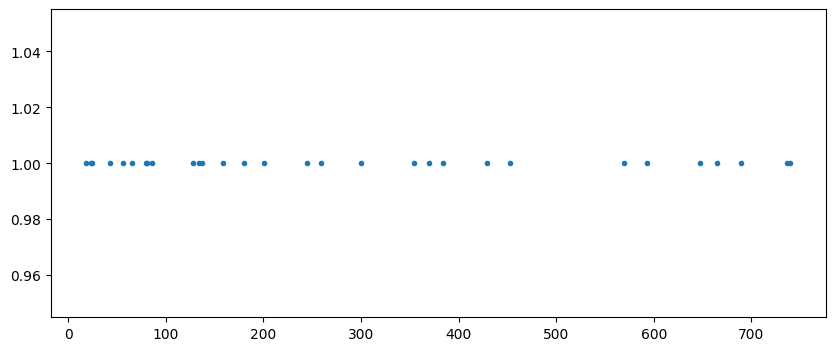

In [60]:
plot_frequence_sol(solutions)

---
## Environnements personnalisés
### Cases avec pénalités
Utilisez la nouvelle classe `FrozenLakeWithPenalties` qui reprend FrozenLake et ajoute  des cases pénalisant le chemin (-1 pour chaque case 'P').
Téléchargez la classe  [FrozenLakeWithPenalties](https://github.com/EmmanuelADAM/IntelligenceArtificiellePython/blob/master/FrozenLakeWithPenalties.py).

In [61]:
import FrozenLakeWithPenalties
# Testez les terrains ci-dessous : 
# cartes avec penalites
map_pen_4x4 = [ "SFFF", "FFFF",  "FPPF", "HFFG" ]
map_pen_10x10 = [ "SFFFPPPPFF", "FFFFPFFFFF", "FHFFPPPFFF", "FFFFPPPFFG", "FFFFPPPFFF", "HFFFFFFFFF", "FFFFFFFFFF", "FHHFFPFFFF", "FFPFFHFHFF", "HFFFFFPFFF" ]

env = FrozenLakeWithPenalties.FrozenLakeWithPenalties(desc=map_pen_10x10, is_slippery=True,   render_mode='ansi')
#TODO: lancer la recherche de solutions...

---
## L'algorithme de Double Q-Learning

#### Explication du double Q-Learning
L'algo de **double** Q-Learning simple repose sur DEUX matrices nb_etats x nb_actions; la mise à jour des valeurs d'une action dans une grille utilise la valeur de la meilleure action suivante dans l'autre matrice.

On réalise, plus ou moins alternativement :

$a^* \gets  argmax_{a} QA(s', a)$,

$QA(s,a) \gets  \lambda \times (r + \gamma \times QB(s', a^*)) + (1-\lambda)\times QA(s,a) $

ou

$b^* \gets  argmax_{a} QB(s', a)$

$QB(s,a) \gets  \lambda \times (r + \gamma \times QA(s', a^*)) + (1-\lambda)\times QB(s,a) $

avec
  - $\lambda$ : coef. d'apprentissage
  - $\gamma$ : coef. de réduction 
  - $r$ : récompense
  
Cette équation donne la qualité de l'action *a* à partir de l'état *s*.

Initialement, à chaque état, une action est choisie aléatoirement (car toutes "valent" 0); puis au fil des tests les actions les plus valuées sont choisies. 

*Vous pouvez voir en fin de cette page des aides sur les fonctionnalités Python utiles pour la manipulation de tableaux.*

#### Initialisation

In [62]:
# initialiser la Q-Table
# autant de cases que l'environnement en possède, 
# contenant autant de valeurs que d'actions possibles
# donc ici une matrice 64 x 4
QA = np.zeros([env.observation_space.n,env.action_space.n])
QB = np.zeros([env.observation_space.n,env.action_space.n])

lambda_learn = .3
gamma = 0.9

#### Travail à faire
- Codez le double q learning dans une fonction proche de celle décrite pour le Q-Learning.
- Reprenez la suite des fonctions développée pour lancer une résolution en mode déterministe et non déterministe. 
- Comparez les performances  (1ere solution trouvée, fréquence des solutions, ...)
- reprenez au choix le simple QLearning, ou le Double Q-Learning et appliquez l'algorithme sur l'environnement CliffWalking-v0 (point de départ en x, arrivée en T, coût de -1 par action sur o, -100 par action sur C).
   
```o  o  o  o  o  o  o  o  o  o  o  o```

```o  o  o  o  o  o  o  o  o  o  o  o```

```o  o  o  o  o  o  o  o  o  o  o  o```

```x  C  C  C  C  C  C  C  C  C  C  T```
